##  Hypertuning Parameter for Best Model

    Model Terpilih : Logistic Regression
    Data yang digunakan : Telco Churn Customer version 3 treatment Encoding 
                          (Kombinasi Label Encode dan One Hot Encoding (lebih dari 3 unique value))
    Treatment yang digunakan : Scaling Data dan Undersampling

In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# Import library for Metrics Score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
# Import Dataset
data = pd.read_csv('data_model3.csv')

In [4]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [5]:
# Import Train Split Test
from sklearn.model_selection import train_test_split

In [6]:
# Split Data Train and Data Test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=41)

In [7]:
#Import Model LogisticRegression
from sklearn.linear_model import LogisticRegression

### Scaling Data and Undersampling Scaling Data

In [8]:
# Import scaling module
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
# Fit scaling on Training Data
feature = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i in feature:
    scal = scaler.fit(np.array(xtrain[i]).reshape(-1,1))
    
    # Transform data xtrain and xtest based on fit data train
    xtrain[i] = scal.transform(np.array(xtrain[i]).reshape(-1,1))

    xtest[i] = scal.transform(np.array(xtest[i]).reshape(-1,1))

In [11]:
# Undersampling Data Scaling
from imblearn.under_sampling import RandomUnderSampler

US = RandomUnderSampler(random_state = 41)
xtrain, ytrain = US.fit_resample(xtrain, ytrain)

### RandomizeSearchCV

In [21]:
# Import Random CV
from sklearn.model_selection import RandomizedSearchCV

In [24]:
model = LogisticRegression()
param = dict()
param['penalty'] = ['l1', 'l2', 'elasticnet']
param['dual'] = [True, False]
param['tol'] = [0.0001, 0.0002, 0.0003, 0.0004]
param['C'] = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0]
param['fit_intercept'] = [True, False]
param['intercept_scaling'] = [1.0, 2.0, 3.0, 4.0, 5,0]
param['class_weight'] = [None, 'balanced']
param['random_state'] = [41, 42, 43]
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param['max_iter'] = [100, 200, 300, 400, 500]
param['multi_class'] = ['auto', 'ovr', 'multinomial']
param['verbose'] = [0, 1, 2, 3]
param['warm_start'] = [True, False]
param['n_jobs'] = [1, 2, 3, 4, 6, 7, 8]
param['l1_ratio'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [25]:
%%time
# RandomizedSearchCV

param_search = RandomizedSearchCV(model, param, n_iter=500, n_jobs=2, cv=2, random_state=41)

result = param_search.fit(xtrain, ytrain)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Best Score: 0.7671370967741935
Best Hyperparameters: {'warm_start': False, 'verbose': 2, 'tol': 0.0001, 'solver': 'newton-cg', 'random_state': 41, 'penalty': 'l2', 'n_jobs': 7, 'multi_class': 'multinomial', 'max_iter': 100, 'l1_ratio': 0.4, 'intercept_scaling': 3.0, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 5.0}
Wall time: 13.9 s


[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished


Parameter from **RandomizeCV**

warm_start= False, verbose= 2, tol= 0.0001, solver= newton-cg, random_state= 41, penalty= l2, n_jobs= 7, multi_class= multinomial, max_iter= 100, l1_ratio= 0.4, intercept_scaling= 3.0, fit_intercept= True, dual= False, class_weight= None, C= 5.0

### GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter to Selection
param['penalty'] = ['l1', 'l2', 'elasticnet']
param['dual'] = [True, False]
param['tol'] = [0.0001, 0.0002, 0.0003, 0.0004]
param['C'] = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0]
param['fit_intercept'] = [True, False]
param['intercept_scaling'] = [1.0, 2.0, 3.0, 4.0, 5.0]
param['class_weight'] = [None, 'balanced']
param['random_state'] = [41, 42, 43]
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param['max_iter'] = [100, 200, 300, 400, 500]
param['multi_class'] = ['auto', 'ovr', 'multinomial']
param['verbose'] = [0, 1, 2, 3]
param['warm_start'] = [True, False]
param['n_jobs'] = [1, 2, 3, 4, 6, 7, 8]
param['l1_ratio'] = [None, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [106]:
model = LogisticRegression()
param = dict()
param['penalty'] = ['l2']
param['dual'] = [False]
param['tol'] = [0.0001]
param['C'] = [4.0]
param['fit_intercept'] = [True]
param['intercept_scaling'] = [1.0]
param['class_weight'] = [None]
param['random_state'] = [41]
param['solver'] = ['lbfgs']
param['max_iter'] = [100]
param['multi_class'] = ['auto']
param['verbose'] = [0]
param['warm_start'] = [True, False]
param['n_jobs'] = [1]
param['l1_ratio'] = [None, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [107]:
# Parameters After Hypertuning with GridSearchCV
param

{'penalty': ['l2'],
 'dual': [False],
 'tol': [0.0001],
 'C': [4.0],
 'fit_intercept': [True],
 'intercept_scaling': [1.0],
 'class_weight': [None],
 'random_state': [41],
 'solver': ['lbfgs'],
 'max_iter': [100],
 'multi_class': ['auto'],
 'verbose': [0],
 'warm_start': [True, False],
 'n_jobs': [1],
 'l1_ratio': [None, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [108]:
%%time
clf = GridSearchCV(model, param, cv=10, return_train_score=False)

clf.fit(xtrain, ytrain)

clf.cv_results_

Wall time: 7.45 s


{'mean_fit_time': array([0.03141782, 0.03151596, 0.03171535, 0.03360987, 0.03032022,
        0.03051844, 0.03271267, 0.02971942, 0.03012187, 0.04019272,
        0.03291349, 0.03081863, 0.03002257, 0.03091805, 0.03191478,
        0.03081837, 0.03031895, 0.03201473, 0.03051865, 0.03091738,
        0.03001966, 0.03091733]),
 'std_fit_time': array([0.00404921, 0.00309628, 0.00226563, 0.00427882, 0.00264543,
        0.00184947, 0.00473428, 0.00183011, 0.00177276, 0.00493394,
        0.00327764, 0.00338308, 0.00180965, 0.00330761, 0.00434723,
        0.002729  , 0.00155777, 0.00329117, 0.00127728, 0.00227427,
        0.00169554, 0.00282096]),
 'mean_score_time': array([0.00189483, 0.00139623, 0.00149598, 0.00179527, 0.00189476,
        0.00179517, 0.00179567, 0.00139632, 0.00179553, 0.00199416,
        0.00199325, 0.00179486, 0.00139637, 0.00179515, 0.00179513,
        0.00169477, 0.00179522, 0.00179491, 0.00159559, 0.00169539,
        0.00169542, 0.00129671]),
 'std_score_time': array([0.00

In [109]:
clf.best_params_

{'C': 4.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 41,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': True}

Parameter from **GridSearchCV**

C= 4.0, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1.0,
l1_ratio= None, max_iter= 100, multi_class= auto, n_jobs= 1, penalty= l2, random_state= 41,
solver= lbfgs, tol= 0.0001, verbose= 0, warm_start= True

### Testing Model with HyperTuning Parameter with RandomSearchCV

In [12]:
LR_R = LogisticRegression(warm_start= False, verbose= 2, tol= 0.0001, solver= 'newton-cg', 
                          random_state= 41, penalty= 'l2', n_jobs= 7, multi_class= 'multinomial', 
                          max_iter= 100, l1_ratio= 0.4, intercept_scaling= 3.0, fit_intercept= True, 
                          dual= False, class_weight= None, C= 5.0)

In [13]:
# Fit Data
LR_R.fit(xtrain, ytrain)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(C=5.0, intercept_scaling=3.0, l1_ratio=0.4,
                   multi_class='multinomial', n_jobs=7, random_state=41,
                   solver='newton-cg', verbose=2)

In [14]:
ypred_lrr = LR_R.predict(xtest)

Text(0.5, 1.0, 'Confussion Matrix for RandomSearchCV')

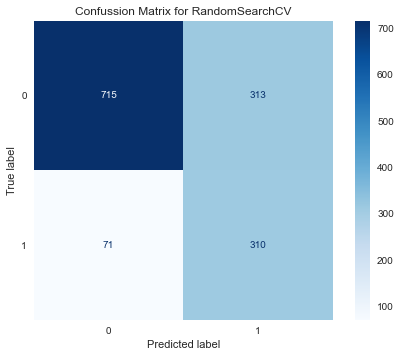

In [15]:
plot_confusion_matrix(LR_R, xtest, ytest, cmap = plt.cm.Blues)
plt.grid(False)
plt.title('Confussion Matrix for RandomSearchCV')

In [16]:
LR_R_train_score = round(LR_R.score(xtrain, ytrain)*100, 2)
LR_R_test_score = round(LR_R.score(xtest, ytest)*100, 2)
LR_R_crossval = cross_val_score(LR_R, xtest, ytest, cv = 10).mean()

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:   

In [56]:
print('Classification Report RandomSearchCV')
print(classification_report(ytest, ypred_lrr))
print(f'Train Score : {LR_R_train_score} %')
print(f'Test Score : {LR_R_test_score} %')
print(f'RandomSearchCV Cross Validation Score : {round(LR_R_crossval*100, 2)} %')
print('\n')

Classification Report RandomSearchCV
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1028
           1       0.50      0.81      0.62       381

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409

Train Score : 77.05 %
Test Score : 72.75 %
RandomSearchCV Cross Validation Score : 78.85 %




### Testing Model with HyperTuning Parameter with GridSearchCV

In [24]:
from sklearn.linear_model import LogisticRegression

LR_G = LogisticRegression(C= 4.0, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1.0,
l1_ratio= None, max_iter= 100, multi_class= 'auto', n_jobs= 1, penalty= 'l2', random_state= 41,
solver= 'lbfgs', tol= 0.0001, verbose= 0, warm_start= True)

In [25]:
# Fit Data
LR_G.fit(xtrain, ytrain)

LogisticRegression(C=4.0, intercept_scaling=1.0, n_jobs=1, random_state=41,
                   warm_start=True)

In [26]:
ypred_lrg = LR_G.predict(xtest)

Text(0.5, 1.0, 'Confussion Matrix for GridSearchCV')

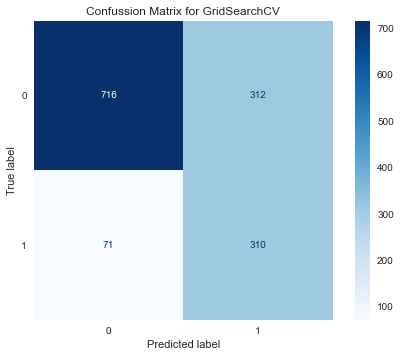

In [27]:
plot_confusion_matrix(LR_G, xtest, ytest, cmap = plt.cm.Blues)
plt.grid(False)
plt.title('Confussion Matrix for GridSearchCV')

In [28]:
LR_G_train_score = round(LR_G.score(xtrain, ytrain)*100, 2)
LR_G_test_score = round(LR_G.score(xtest, ytest)*100, 2)
LR_G_crossval = cross_val_score(LR_G, xtest, ytest, cv = 10).mean()

In [57]:
print('Classification Report GridSearchCV')
print(classification_report(ytest, ypred_lrg))
print(f'Train Score : {LR_G_train_score} %')
print(f'Test Score : {LR_G_test_score} %')
print(f'GridSearchCV Cross Validation Score : {round(LR_G_crossval*100, 2)} %')
print('\n')

Classification Report GridSearchCV
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1028
           1       0.50      0.81      0.62       381

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409

Train Score : 77.08 %
Test Score : 72.82 %
GridSearchCV Cross Validation Score : 78.64 %




### Testing Model without Hypertuning

In [30]:
lr =LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, random_state = 41)

In [31]:
# Fit Data
lr.fit(xtrain, ytrain)

LogisticRegression(random_state=41)

In [32]:
ypred_lr = lr.predict(xtest)

Text(0.5, 1.0, 'Confussion Matrix for Baseline Model')

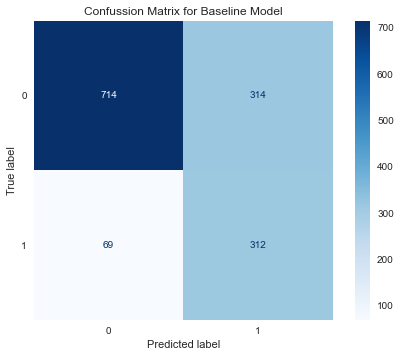

In [33]:
plot_confusion_matrix(lr, xtest, ytest, cmap = plt.cm.Blues)
plt.grid(False)
plt.title('Confussion Matrix for Baseline Model')

In [34]:
lr_train_score = round(lr.score(xtrain, ytrain)*100, 2)
lr_test_score = round(lr.score(xtest, ytest)*100, 2)
lr_crossval = cross_val_score(lr, xtest, ytest, cv = 10).mean()

In [1]:
print('Classification Report Baseline Model')
print(classification_report(ytest, ypred_lr))
print(f'Train Score : {lr_train_score} %')
print(f'Test Score : {lr_test_score} %')
print(f'Baseline Model Cross Validation Score : {round(lr_crossval*100, 2)} %')
print('\n')

Classification Report Baseline Model


NameError: name 'classification_report' is not defined

Hypertuning Parameter tidak digunakan dikarenakan metrics yang diperoleh lebih rendah dibandingkan tanpa dilakukan Hypertuning.
Lanjut ke **Feature Selection**

### Feature Selection

In [36]:
# Get Importance of All Feature
importance = lr.coef_[0]

In [37]:
importance

array([ 0.04303422,  0.08393796,  0.03013694, -0.14776306, -2.70722531,
       -1.16901567,  0.03150818,  0.28616321, -0.2548379 , -0.09453214,
       -0.0866823 , -0.1771995 , -0.04530976,  0.0431146 , -0.84320237,
        0.27456385,  2.77554406,  0.97320849, -0.15040538, -0.20059571,
        0.29528687,  0.05222065])

In [38]:
# Dataframe for All Importance Feature
kolom_data = list(X.columns)
data_imp = pd.DataFrame({'Feature': kolom_data,
                       'Value of Importance': importance})
data_imp.set_index('Feature')

,Value of Importance
Feature,
gender,0.043034
SeniorCitizen,0.083938
Partner,0.030137
Dependents,-0.147763
tenure,-2.707225
PhoneService,-1.169016
MultipleLines,0.031508
InternetService,0.286163
OnlineSecurity,-0.254838


<AxesSubplot:xlabel='Feature'>

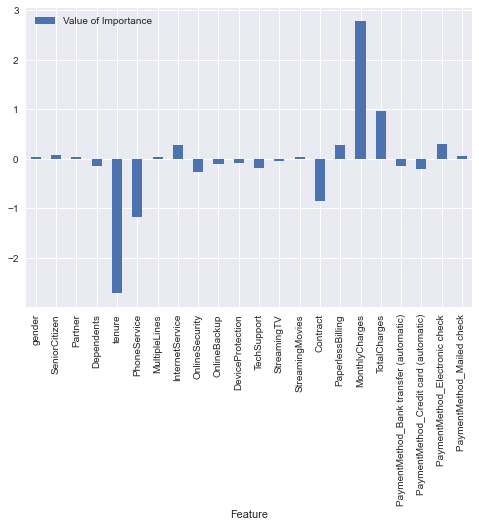

In [39]:
# Visualization Value of Importance
data_imp.set_index('Feature').plot.bar()

In [40]:
# Absolute value of importance to get all value positive
def absolute(x):
    if x['Value of Importance'] <0:
        return x['Value of Importance']*-1
    else:
        return x['Value of Importance']
data_imp['Value of Importance'] = data_imp.apply(lambda x: absolute(x), axis=1)

In [41]:
# Sort Value of Importance Value
data_imp.sort_values(by='Value of Importance', ascending = False)

,Feature,Value of Importance
16,MonthlyCharges,2.775544
4,tenure,2.707225
5,PhoneService,1.169016
17,TotalCharges,0.973208
14,Contract,0.843202
20,PaymentMethod_Electronic check,0.295287
7,InternetService,0.286163
15,PaperlessBilling,0.274564
8,OnlineSecurity,0.254838
19,PaymentMethod_Credit card (automatic),0.200596


<AxesSubplot:xlabel='Feature'>

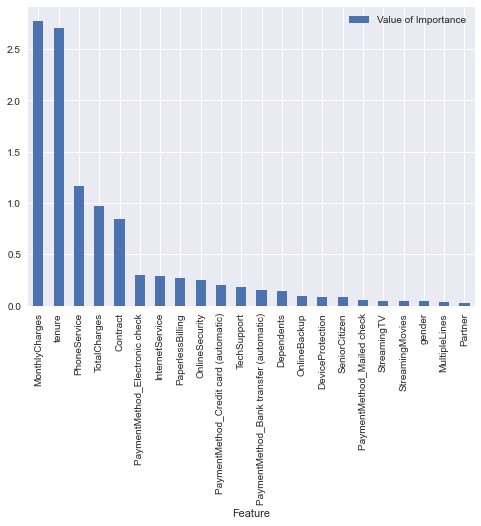

In [42]:
# Visualization Absolute Value of Importance 
data_imp.sort_values(by='Value of Importance', ascending = False).set_index('Feature').plot.bar()

In [43]:
## Buang Feature yang nilainya dibawah 0.05
list(data_imp[data_imp['Value of Importance'] < 0.05]['Feature'])

list_drop = list(data_imp[data_imp['Value of Importance'] < 0.05]['Feature'])

In [44]:
list_drop.append('TotalCharges')

In [45]:
list_drop

['gender',
 'Partner',
 'MultipleLines',
 'StreamingTV',
 'StreamingMovies',
 'TotalCharges']

In [46]:
# Drop Feature in Xtrain and Xtest
xtrain_selection = xtrain.drop(list_drop, axis=1)
xtest_selection = xtest.drop(list_drop, axis=1)

In [47]:
xtrain_selection

,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0.513889,0,0,2,0,2,2,1,1,0.217240,0,0,1,0
1,0,1,0.055556,0,0,2,0,0,0,0,0,0.200797,0,1,0,0
2,0,0,1.000000,1,1,2,2,2,2,2,1,0.967613,1,0,0,0
3,0,1,0.638889,1,2,1,1,1,1,2,0,0.015446,0,1,0,0
4,0,0,0.888889,1,2,1,1,1,1,2,0,0.071251,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0,0,0.166667,1,0,0,0,0,2,1,1,0.412556,0,0,1,0
2972,0,0,0.236111,1,1,2,2,0,0,0,1,0.757349,0,0,1,0
2973,0,0,0.125000,1,1,0,0,2,0,0,1,0.571500,1,0,0,0
2974,0,0,0.388889,1,1,0,2,2,0,0,1,0.869955,0,0,1,0


### Testing New Feature in Best Model

In [48]:
lr_selection = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, random_state = 41)

In [49]:
xtrain_selection.shape

(2976, 16)

In [50]:
ytrain.shape

(2976,)

In [51]:
# Fit Data
lr_selection.fit(xtrain_selection, ytrain)

LogisticRegression(random_state=41)

In [52]:
ypred_lrselection = lr_selection.predict(xtest_selection)

Text(0.5, 1.0, 'Confussion Matrix for Feature Selection')

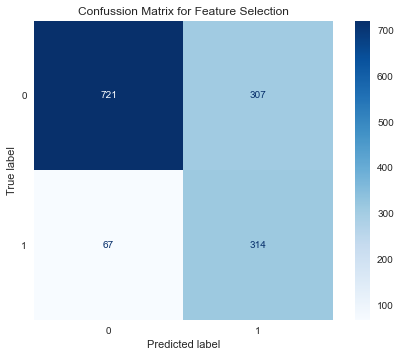

In [53]:
plot_confusion_matrix(lr_selection, xtest_selection, ytest, cmap = plt.cm.Blues)
plt.grid(False)
plt.title('Confussion Matrix for Feature Selection')

In [54]:
lr_selection_train_score = round(lr_selection.score(xtrain_selection, ytrain)*100, 2)
lr_selection_test_score = round(lr_selection.score(xtest_selection, ytest)*100, 2)
lr_selection_crossval = cross_val_score(lr_selection, xtest_selection, ytest, cv = 10).mean()

In [55]:
print('Classification Report Data 1')
print(classification_report(ytest, ypred_lrselection))
print(f'Train Score : {lr_selection_train_score} %')
print(f'Test Score : {lr_selection_test_score} %')
print(f'Feature Selection Cross Validation Score : {round(lr_selection_crossval*100, 2)} %')
print('\n')

Classification Report Data 1
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1028
           1       0.51      0.82      0.63       381

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409

Train Score : 77.05 %
Test Score : 73.46 %
Feature Selection Cross Validation Score : 78.35 %


